# SEABORN: Análisis exploratorio de datos.

Importamos librerias y DataFrames necesarias.

In [85]:
# Importamos todos los paquetes que vayamos a necesitar
from sklearn.datasets import load_iris
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import squarify

# Algunas configuraciones de los paquetes
pd.set_option("display.max_rows", 500) # Cuántas filas de los DataFrames nos muestra pandas en el Notebook
sns.set(color_codes=True)

import warnings
warnings.filterwarnings("ignore") #Para que no noes muestre los avisos (tipo x codigo esta depecrado)

Dataframe de boston:

In [2]:
load_boston = pd.read_csv(filepath_or_buffer="http://lib.stat.cmu.edu/datasets/boston",
                          delim_whitespace=True,
                          skiprows=21,
                          header=None,
                          )

columns = ['CRIM',
           'ZN',
           'INDUS',
           'CHAS',
           'NOX',
           'RM',
           'AGE',
           'DIS',
           'RAD',
           'TAX',
           'PTRATIO',
           'B',
           'LSTAT',
           'MEDV',
           ]

# Encola todos los datos en una lista y elimina los valores nulos
values_w_nulls = load_boston.values.flatten()
print(load_boston.values)
all_values = values_w_nulls[~np.isnan(values_w_nulls)]

# Reestructuramos los datos en 14 columnas y creamos un nuevo DataFrame 
boston_df = pd.DataFrame(
    data = all_values.reshape(-1, len(columns)),
    columns = columns,
    )

boston_df.rename(columns={'MEDV': 'target'}, inplace=True)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.0000e+00 2.9600e+02 1.5300e+01]
 [3.9690e+02 4.9800e+00 2.4000e+01 ...        nan        nan        nan]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 2.0000e+00 2.4200e+02 1.7800e+01]
 ...
 [3.9345e+02 6.4800e+00 2.2000e+01 ...        nan        nan        nan]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 1.0000e+00 2.7300e+02 2.1000e+01]
 [3.9690e+02 7.8800e+00 1.1900e+01 ...        nan        nan        nan]]


Otros set de datos:

In [3]:
# Cargamos las features en un DataFrame:
iris_df = pd.DataFrame(load_iris()["data"],columns=load_iris()["feature_names"])

# Y añadimos la columna de especies:
iris_df["target"] = load_iris()["target_names"][load_iris()["target"]]

# Cargamos tb el dataset del titanic
titanic_df = pd.read_csv("data/titanic.csv", sep="\t")

# Cargamos los datos del supermarket sales
market_df = pd.read_csv("data/supermarket_sales.csv")

# Cargamos dataset de enfermedad cardiaca
heart_df = pd.read_csv("data/heart_disease.csv", sep=',')

## TIPOS DE VARIABLES
![imagen](./img/dtypes.png)

## 1. Análisis univariante

1) Variables cuantitativas: numericas.
    - Densidad
    - Histogramas
    - Boxplot
    - Violinplot
2) Variables cualitativas: categoricas
    - Lollipop
    - Donut chart/ Pie chart

### 1.1 Variables cuantitativas
#### Densidad
Para analizar la distribución de los datos. Ejemplo con el dataframe de Titanic. En los siguientes casos se analiza la columna de datos 'Fare'


In [4]:
titanic_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


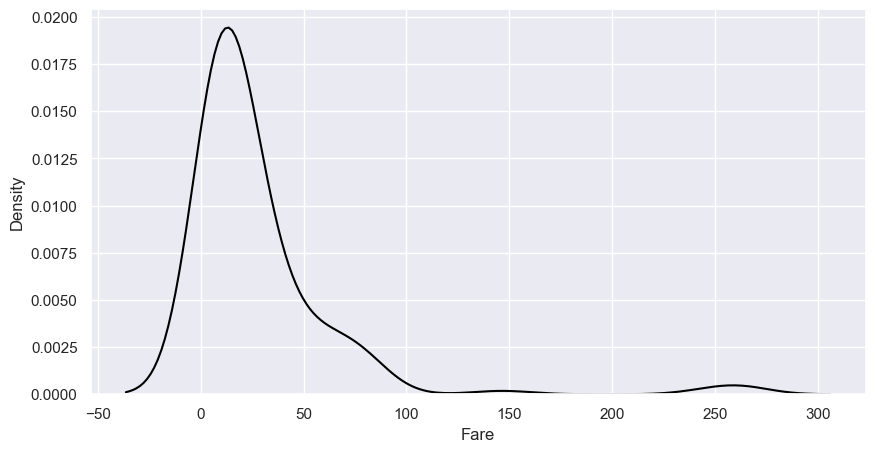

In [5]:
plt.figure(figsize=(10,5))
sns.distplot(titanic_df['Fare'], hist=False, color='black');

#### Histograma

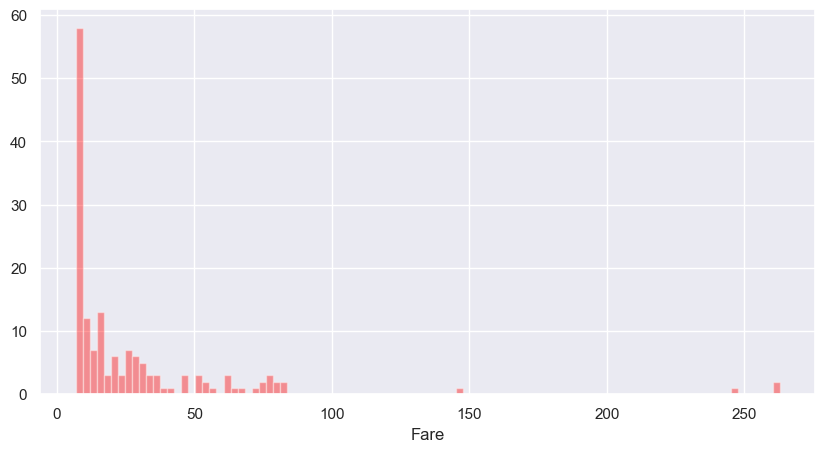

In [6]:
plt.figure(figsize=(10,5))
sns.distplot(titanic_df['Fare'],
            kde=False, #Para que no salga la curva de densidad
            color='red',
            bins=100);

### Histograma + Densidad

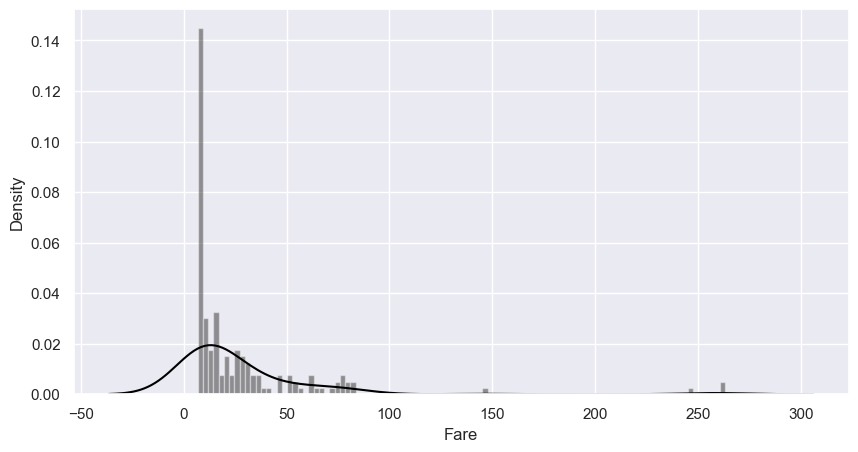

In [7]:
plt.figure(figsize=(10,5))
sns.distplot(titanic_df['Fare'], 
            color='black',
            hist=True,
            bins=100,);

Caracteristicas del histograma y de la densidad por separado:

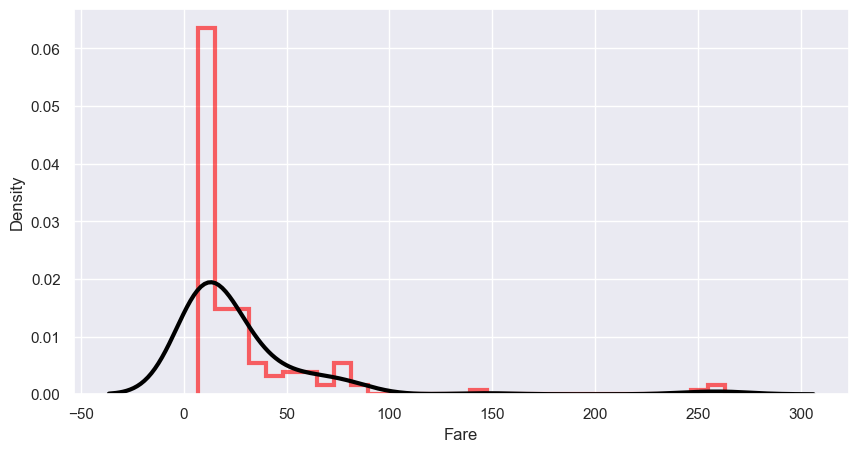

In [8]:
plt.figure(figsize=(10,5))
sns.distplot(titanic_df['Fare'],
            kde_kws={'color':'black','lw':3,"label": "KDE"},
            hist_kws={'histtype':'step','color':'red','alpha':0.6,"linewidth": 3});

Si queremos un grafico mas representativo teniendo en cuenta nuestros datos:

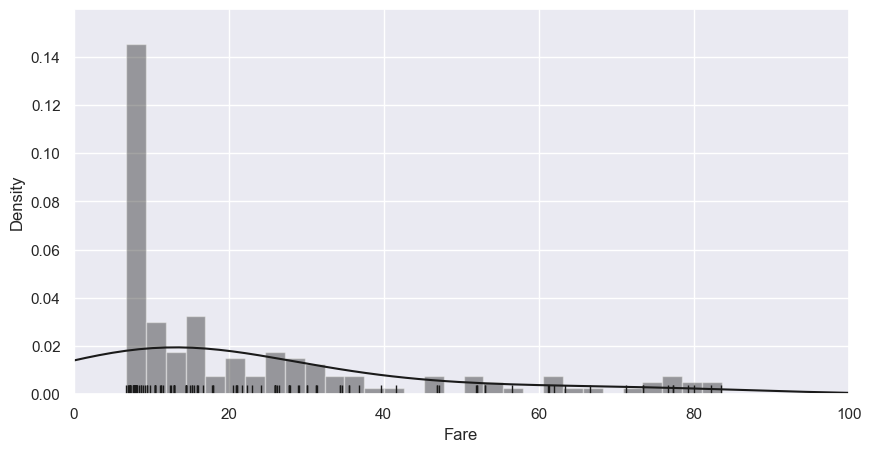

In [9]:
plt.figure(figsize=(10,5))
sns.distplot(titanic_df["Fare"],
            rug=True, #concentracion de datos
            bins=100,
            color='k')
plt.xlim(0, 100);

### Boxplot
Parecido a los dos anteriores, pero nos proporcionan mas informacion de los outliers.

![imagen](./img/boxplot.png)

In [10]:
p_0 = np.percentile(titanic_df["Fare"], 0) #Q0 #Min
p_25 = np.percentile(titanic_df["Fare"], 25) #Q1
p_50 = np.percentile(titanic_df["Fare"], 50) #Q2 #Mediana
p_75 = np.percentile(titanic_df["Fare"], 75) #Q3
p_100 = np.percentile(titanic_df["Fare"], 100) #Q4 #Max

print("Valor del percentil 0:", p_0)
print("Valor del percentil 25:", p_25)
print("Valor del percentil 50:", p_50)
print("Valor del percentil 75:", p_75)
print("Valor del percentil 100:", p_100)
print("Valor media:", round(titanic_df["Fare"].mean(),2) )

Valor del percentil 0: 6.75
Valor del percentil 25: 8.00315
Valor del percentil 50: 14.4542
Valor del percentil 75: 30.37185
Valor del percentil 100: 263.0
Valor media: 28.11


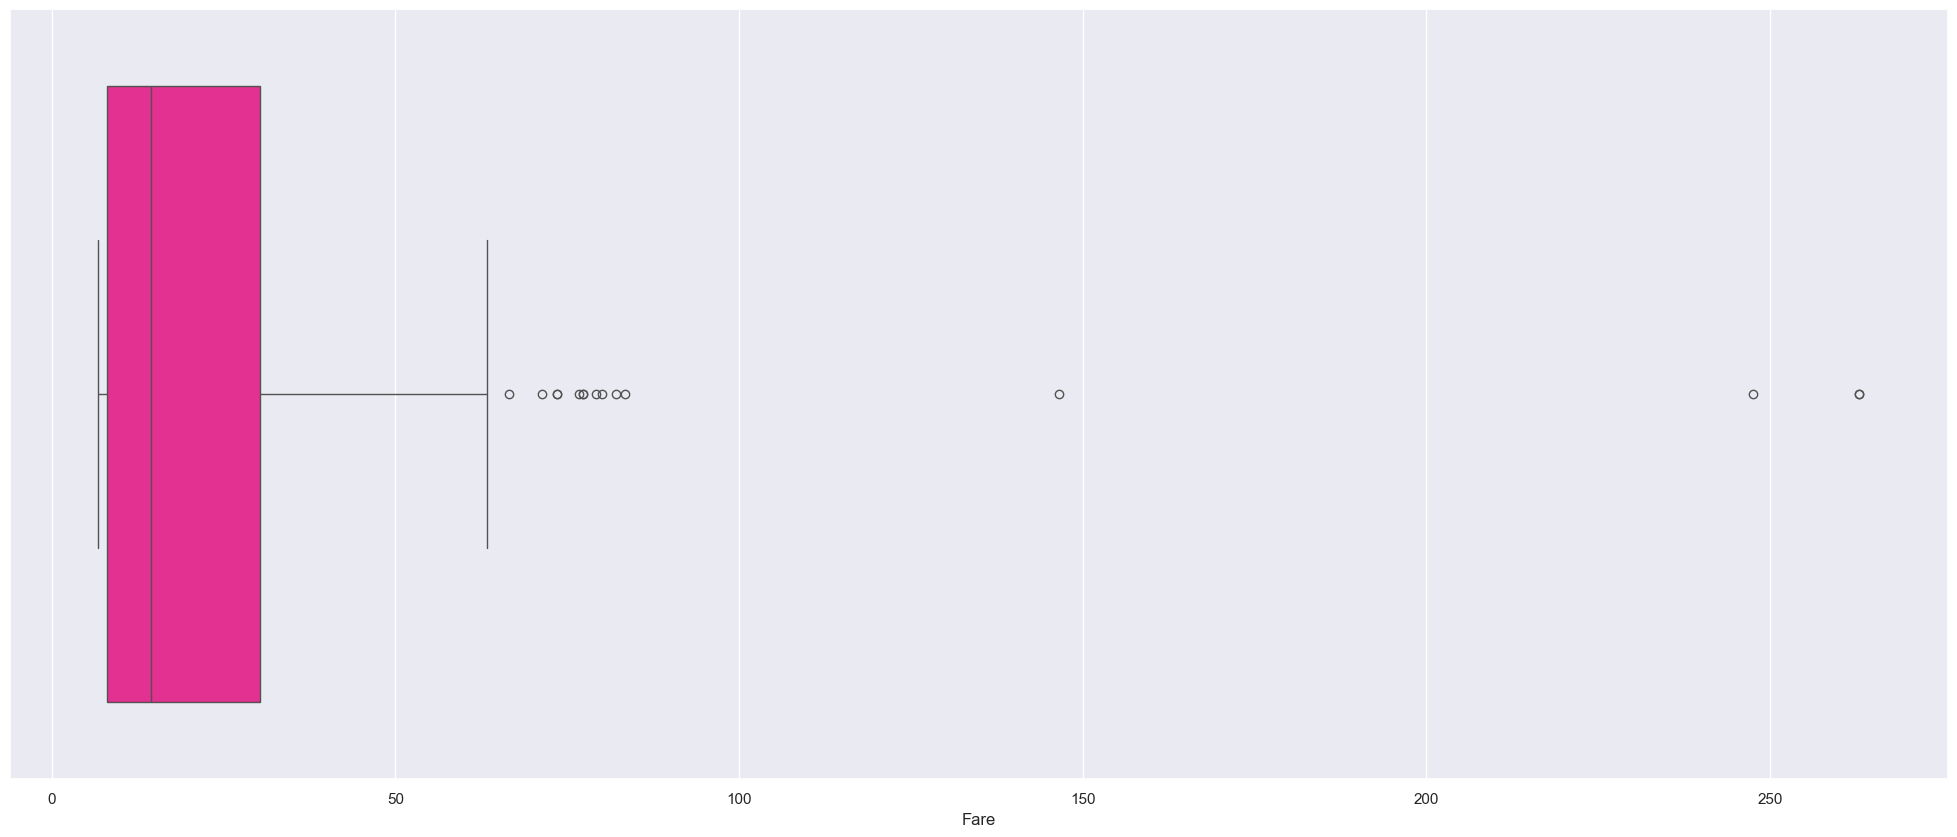

In [11]:
plt.figure(figsize=(25,10))
sns.boxplot(x=titanic_df['Fare'], color='deeppink');

### Violinplot

Igual que un diagrama de caja (boxplot) pero en este caso tiene la funcion de distribución en lugar de la propia caja.

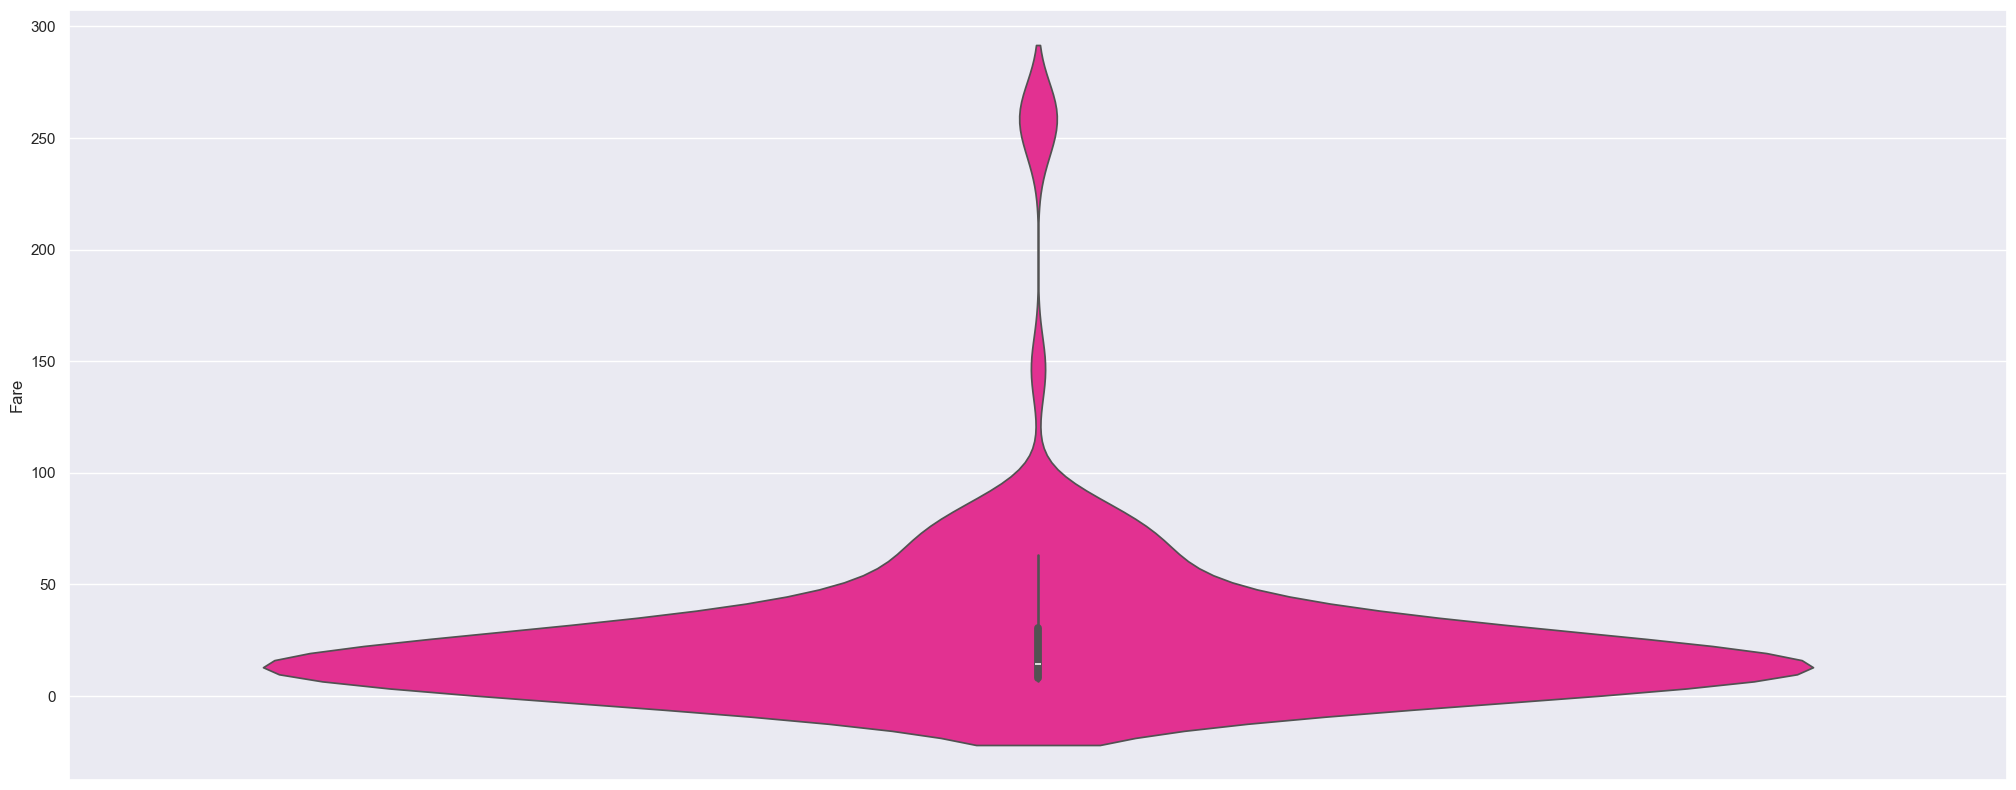

In [12]:
plt.figure(figsize=(25,10))
sns.violinplot(titanic_df['Fare'], color='deeppink');

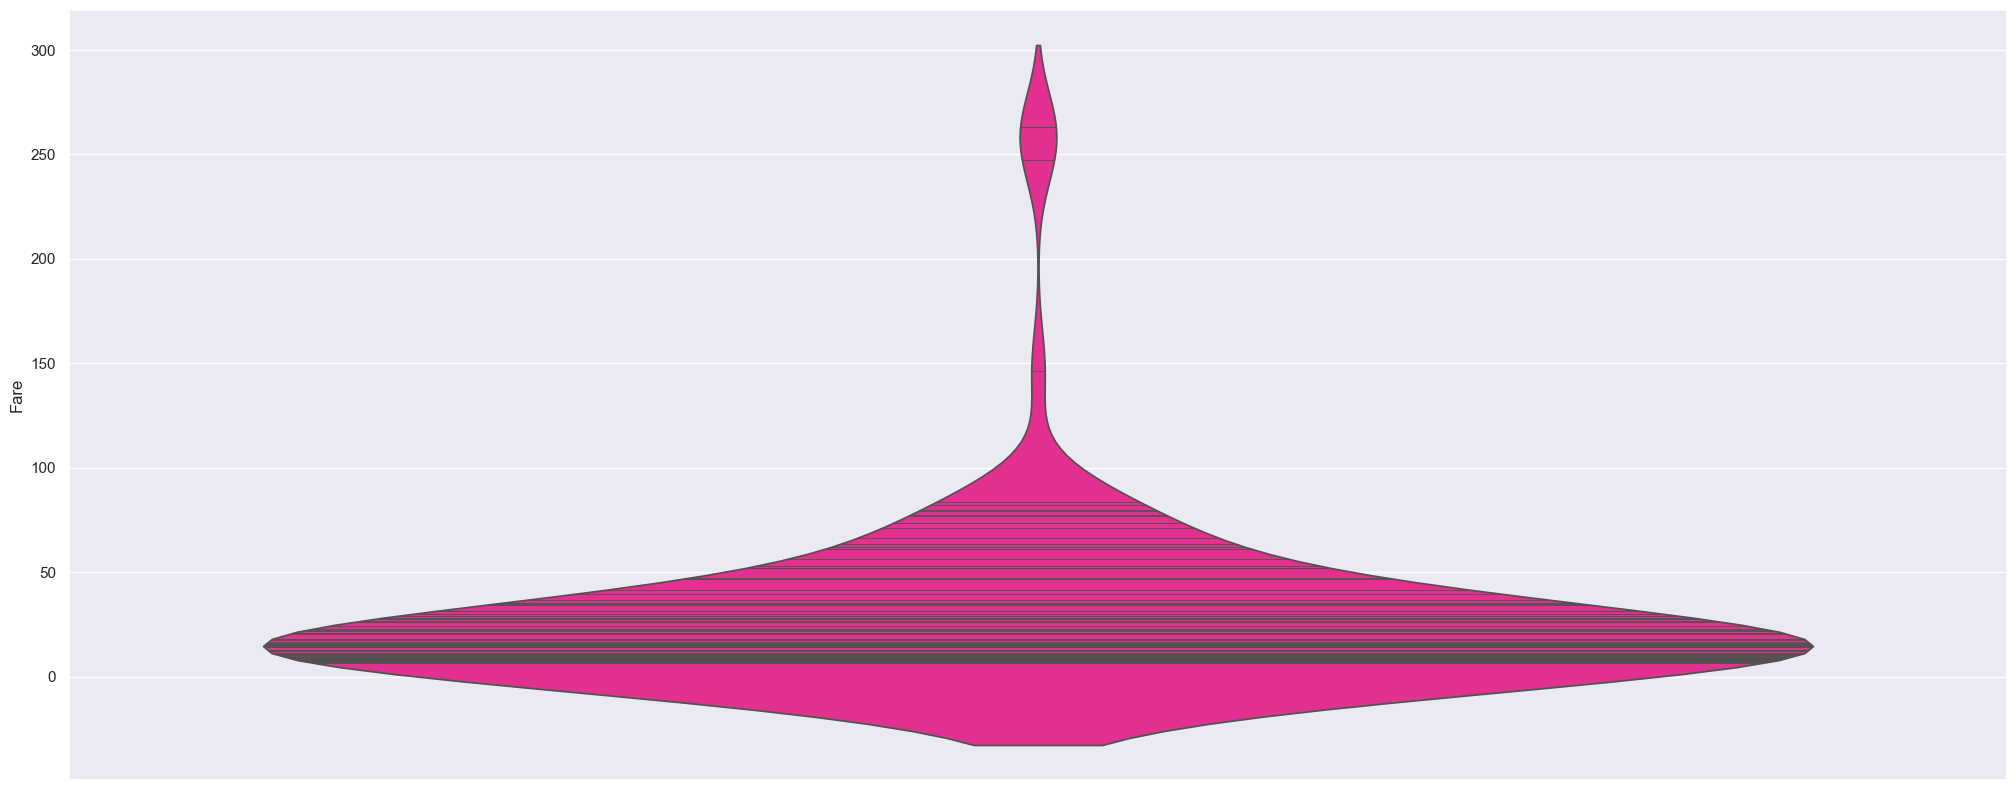

In [13]:
plt.figure(figsize=(25,10))
sns.violinplot(titanic_df['Fare'], 
                color='deeppink',
                bw=0.5,
                inner='stick');

#inner: muestra cada observacion (stick, point, quart...)
#bw: cambiar el grosor 

## 1.1 Variables cualitativas

Variables categoricas. Se toma la frecuencia en la que aparecen los valores.


In [14]:
titanic_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

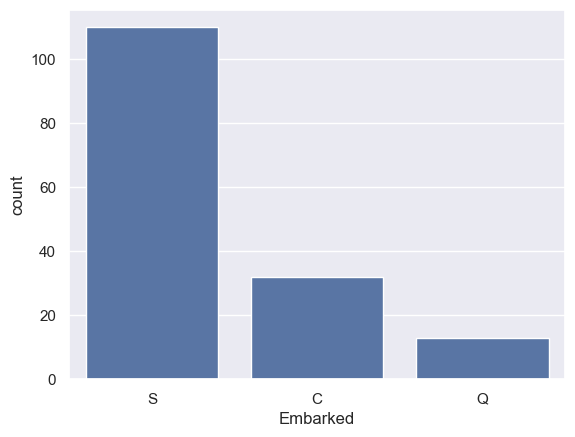

In [15]:
sns.countplot(x=titanic_df['Embarked']); #conteo de valores

### Lollipop

Ejemplo con el dataframe de Market. Queremos saber de que sección son los productos mas vendidos.


In [16]:
market_df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6


Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64


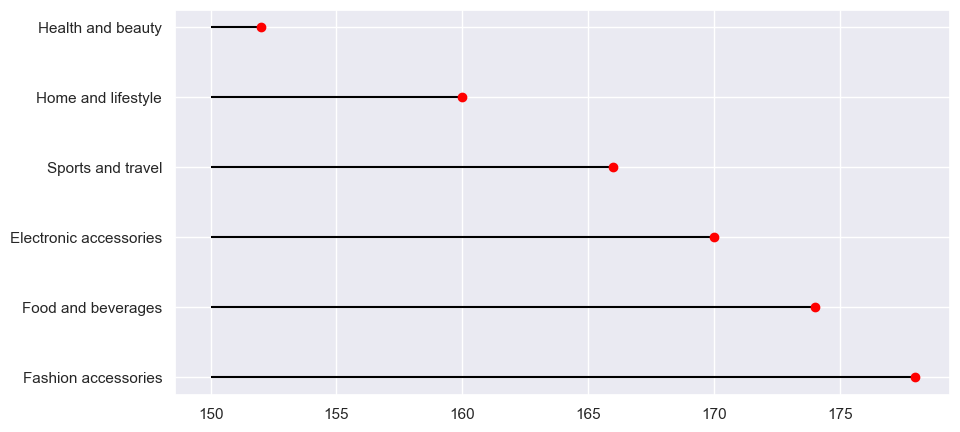

In [17]:
conteo=market_df['Product line'].value_counts(ascending=False)
print(conteo)

plt.figure(figsize=(10,5))
plt.hlines(y=conteo.index, #nombres de lo que se ha contado
            xmin=150,
            xmax=conteo,
            color='black')
plt.plot(conteo, conteo.index,'o', color='red'); #dibuja la bola

Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64


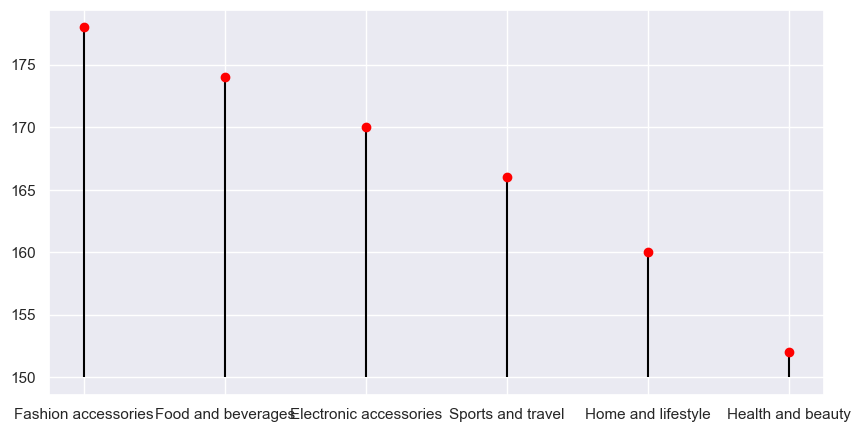

In [18]:
conteo=market_df['Product line'].value_counts(ascending=False)
print(conteo)

plt.figure(figsize=(10,5))
plt.vlines(x=conteo.index, #nombres de lo que se ha contado
            ymin=150,
            ymax=conteo,
            color='black')
plt.plot(conteo.index, conteo,'o', color='red'); #dibuja la bola

### Donut/Pie chart


In [19]:
datos=titanic_df['Embarked'].value_counts()
print(datos)
print('-'*100)
print(datos.index)
print('-'*100)
print(datos.values)

Embarked
S    110
C     32
Q     13
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Index(['S', 'C', 'Q'], dtype='object', name='Embarked')
----------------------------------------------------------------------------------------------------
[110  32  13]


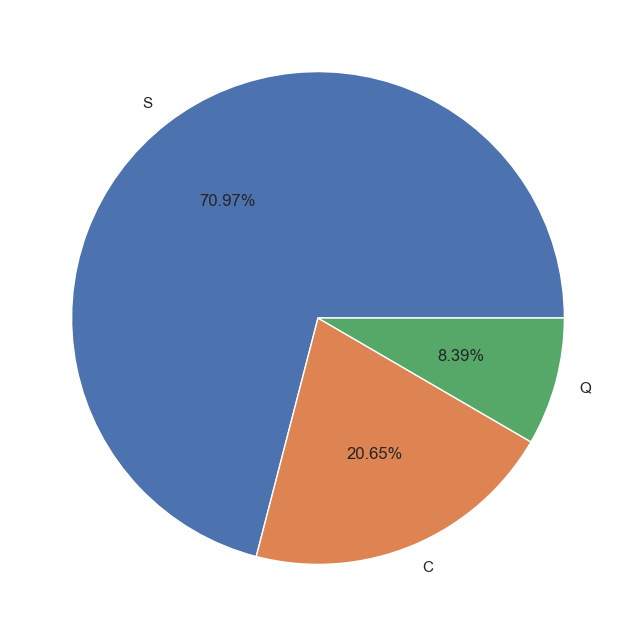

In [20]:
plt.figure(figsize=(8,8))
plt.pie(datos.values,
        labels=datos.index,
        autopct='%1.2f%%');

La grafica del donut en la teoria es lo mismo pero con un hueco dentro. Por lo tanto para crearlo lo que debemops hacer es editar la grafica del pie.

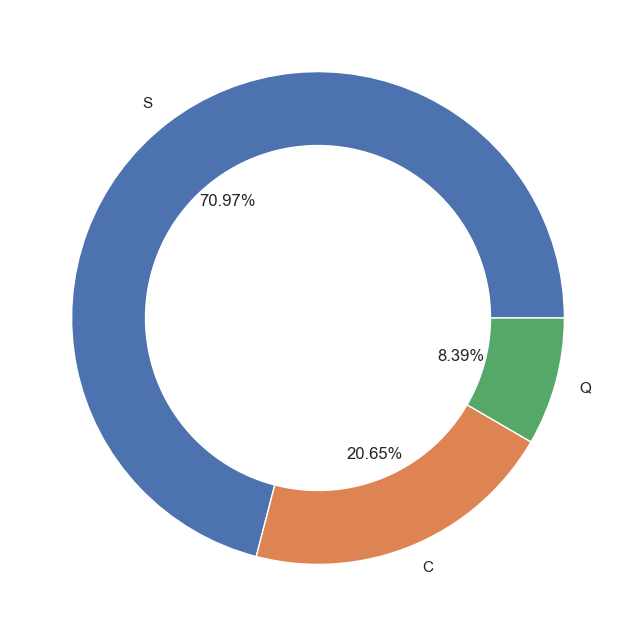

In [21]:
circulo=plt.Circle((0,0),
                    0.7, #grosor
                    color='white')

plt.figure(figsize=(8,8))
plt.pie(datos.values,
        labels=datos.index,
        autopct='%1.2f%%');

p=plt.gcf() #get current figure (coje la ultima figura)
p.gca().add_artist(circulo);

## 2. Análisis Bivariante

1) Comparativa de variables cuantitativas. 

    - 2-4 variables.
        - Boxplot
        - Diagramas de densidad
        - Histogramas
        - Scatter plot
        - joinplot
        
    - Multiples variables.
        - Heatmaps
        - Correlograma

2) Comparativa de variables cualitativas.

    - 2 variables.
        - Tabla
        - Diagrama de barras

3) Comparativa de variables cualitativas con variables cuantitativas.

    - Time series
    - Treemap
    - Bubble chart

### 2.1 Comparativa de variables cuantitativas (2-4 variables)
#### Boxplot
Como ejemplo tomamos el dataset IRIS. Analizaremos como de diferentes son las distribuciones de las 4 caracteristicas que definen a una flor.

In [22]:
iris_df.head(2) 
#queremos comparar las 4 primeras columnas

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


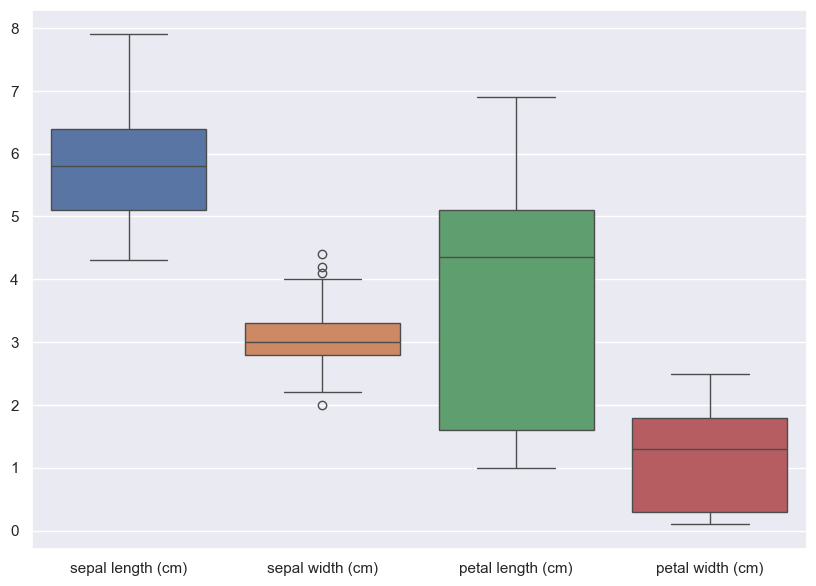

In [23]:
plt.figure(figsize=(10,7))
sns.boxplot(data=iris_df[iris_df.columns.values[0:4]]);

Para una imagen mas completa que nos demuestre la distribución real de los puntos:

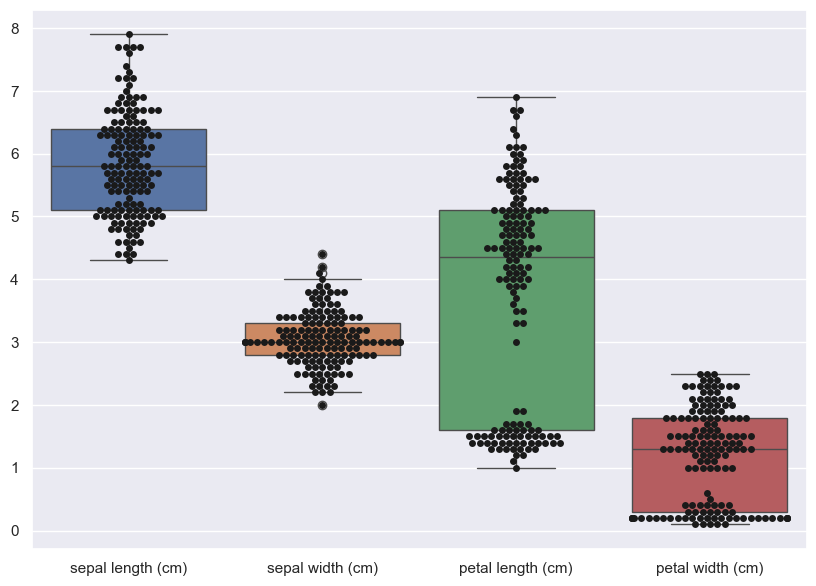

In [27]:
plt.figure(figsize=(10,7))

#Dibujar boxplot:
sns.boxplot(data=iris_df[iris_df.columns.values[0:4]])

#Dibujar distribucion de los datos por encima:
sns.swarmplot(data=iris_df[iris_df.columns.values[0:4]],
              color='k',
              edgecolor='gray');

#### Diagramas de densidad.


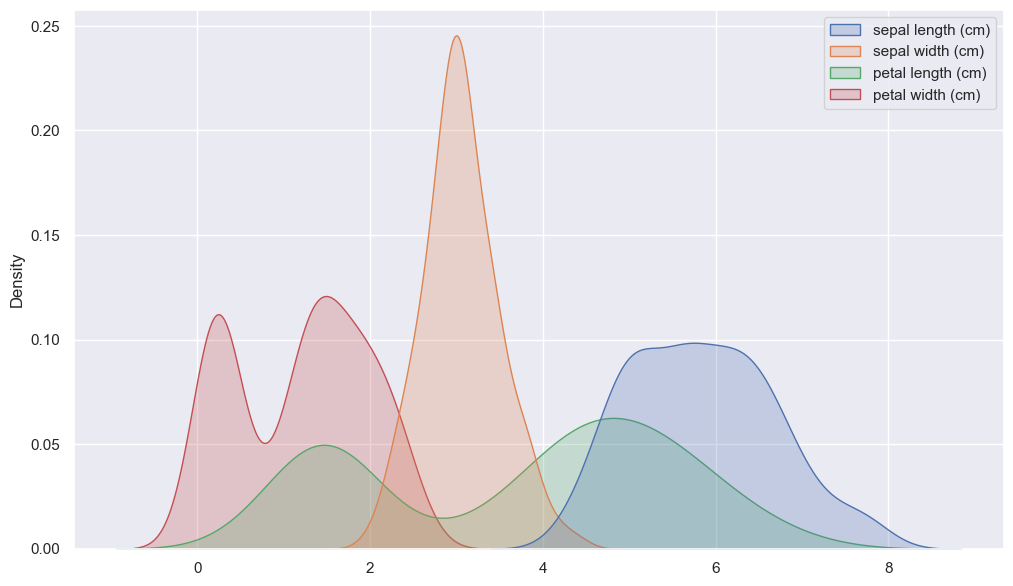

In [30]:
plt.figure(figsize=(12,7))
sns.kdeplot(data=iris_df[iris_df.columns.values[0:4]], 
            shade=True); #relleno

### Histogramas.

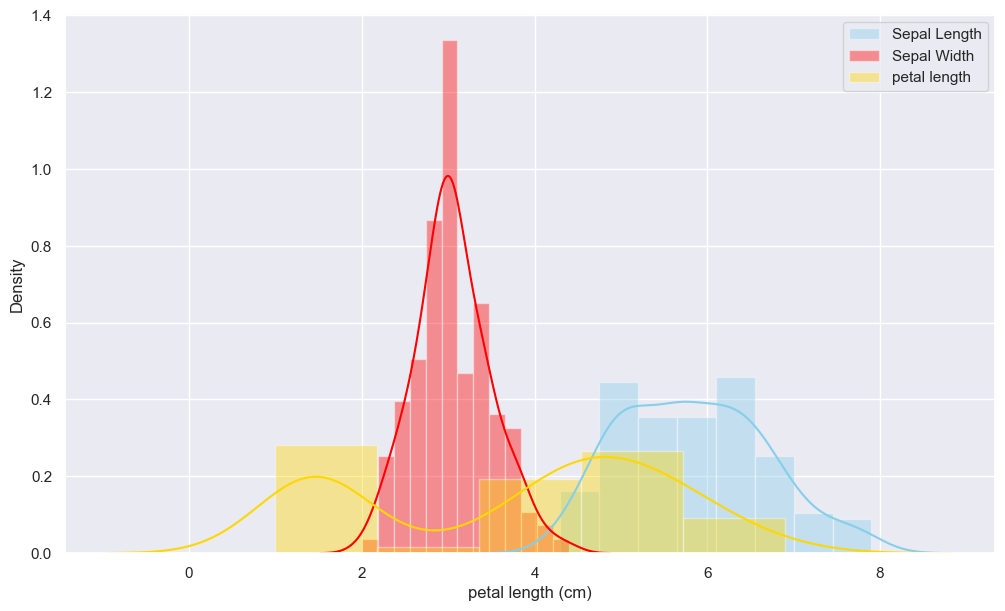

In [31]:
plt.figure(figsize=(12,7))
sns.distplot(iris_df["sepal length (cm)"] , color="skyblue", label="Sepal Length")
sns.distplot(iris_df["sepal width (cm)"] , color="red", label="Sepal Width")
sns.distplot(iris_df["petal length (cm)"] , color="gold",label='petal length')
plt.legend();

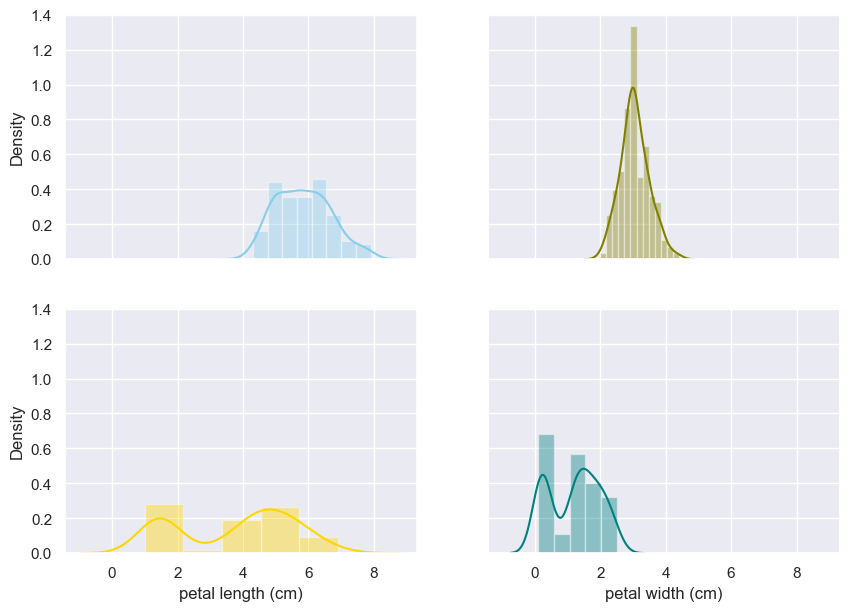

In [32]:
f, axes = plt.subplots(2, 2, figsize=(10,7), sharex=True, sharey=True)
sns.distplot(iris_df["sepal length (cm)"] , color="skyblue", ax=axes[0, 0])
sns.distplot(iris_df["sepal width (cm)"] , color="olive", ax=axes[0, 1])
sns.distplot(iris_df["petal length (cm)"] , color="gold", ax=axes[1, 0])
sns.distplot(iris_df["petal width (cm)"] , color="teal", ax=axes[1, 1]);

### Scatter plot

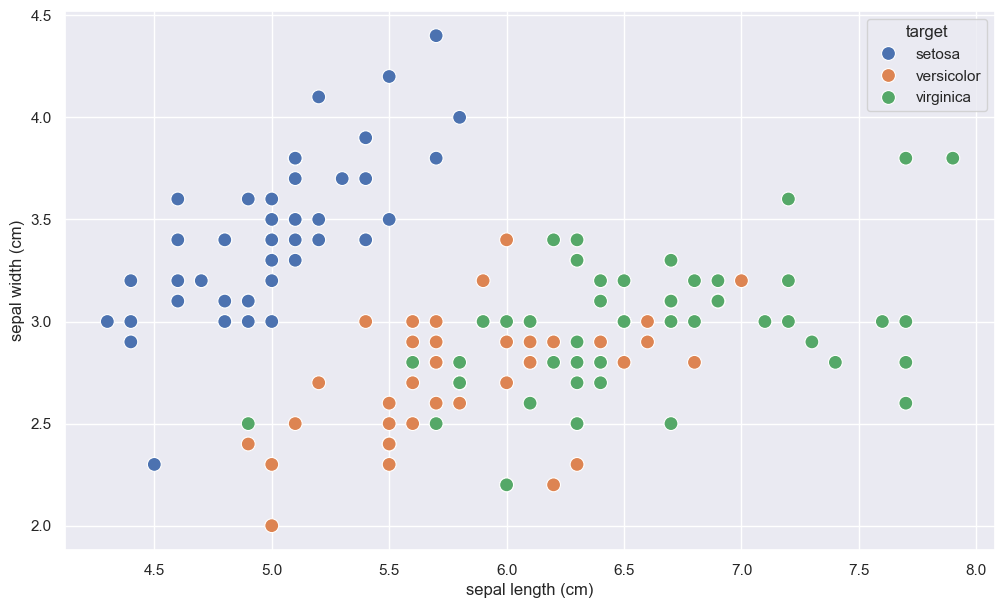

In [33]:
plt.figure(figsize=(12,7))
sns.scatterplot(x=iris_df['sepal length (cm)'],
                y=iris_df['sepal width (cm)'],
                hue = iris_df['target'], 
               s=100);

### Jointplot

Tomamos como ejemplo en dataset BOSTON. Poblacion con poco poder adquisitivo vs media de habitaciones por vivienda.

In [34]:
boston_df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


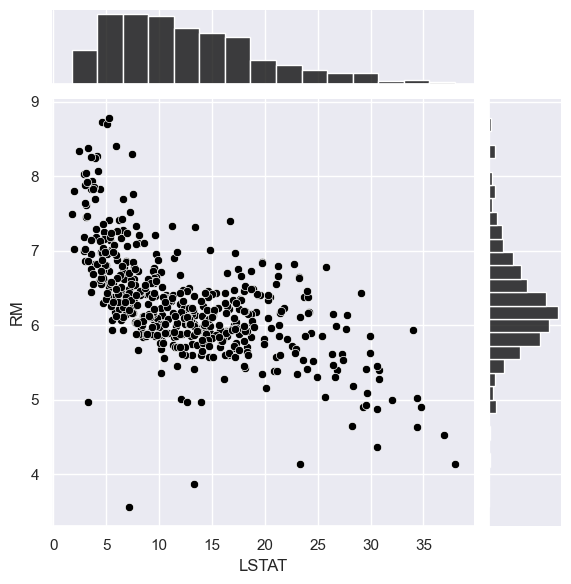

In [38]:
sns.jointplot(x=boston_df['LSTAT'],
              y=boston_df['RM'],
              color='black',
              height=6); #como el zoom

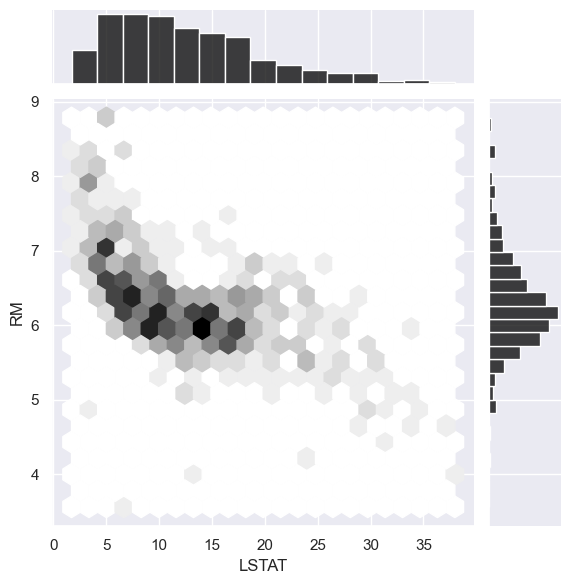

In [39]:
sns.jointplot(x=boston_df['LSTAT'],
              y=boston_df['RM'],
              color='black',
              kind='hex'); #como el zoom

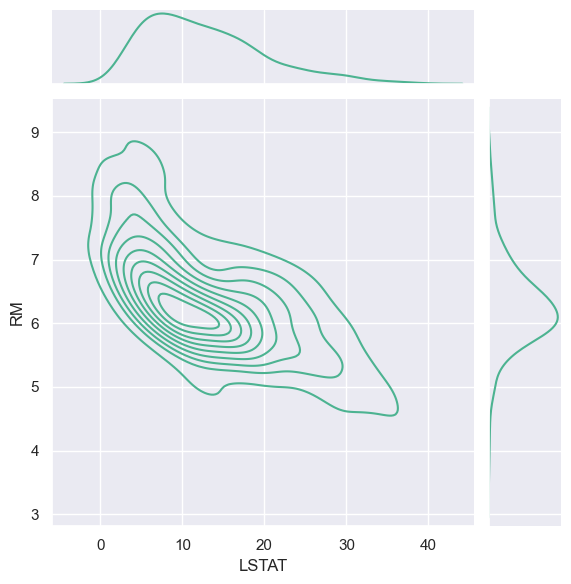

In [40]:
sns.jointplot(x=boston_df['LSTAT'],
              y=boston_df['RM'],
              kind="kde", #curbas de densidad
              color="#4CB391");

### 2.2 Comparativa de multiples variables cuantitativas
#### Heatmaps
Utiles para representar matrices de correlacion.

In [42]:
boston_df.corr().head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445


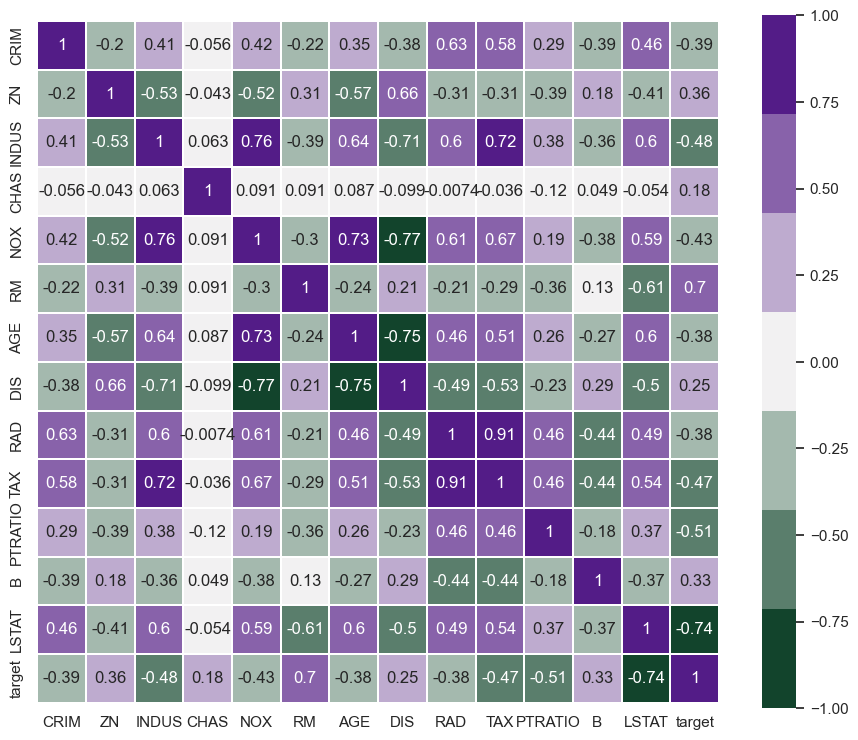

In [51]:
plt.figure(figsize=(11,9))
sns.heatmap(boston_df.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7), #paleta de colores
            square=True,
            linewidths=.1,
            annot=True); #escribir numeros dentro de cada cuadro

#### Correlograma
Para ver en un dataset qué variables presentan correlación lineal, así como sus distribuciones. NO realices esta gráfica con muchas variables porque no se va a ver bien. Hazlo por partes.

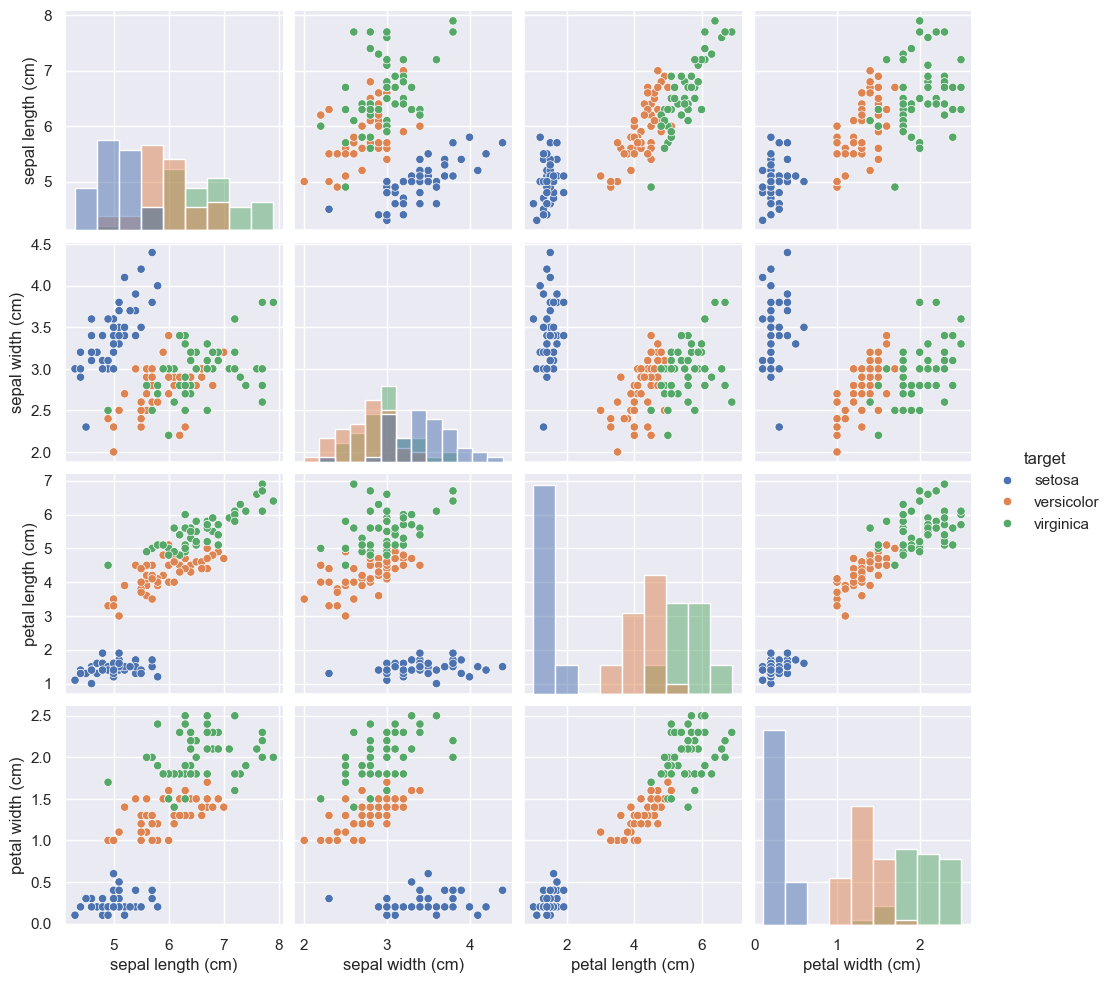

In [57]:
sns.pairplot(iris_df, 
             kind='scatter',
             hue='target',
             diag_kind='hist');

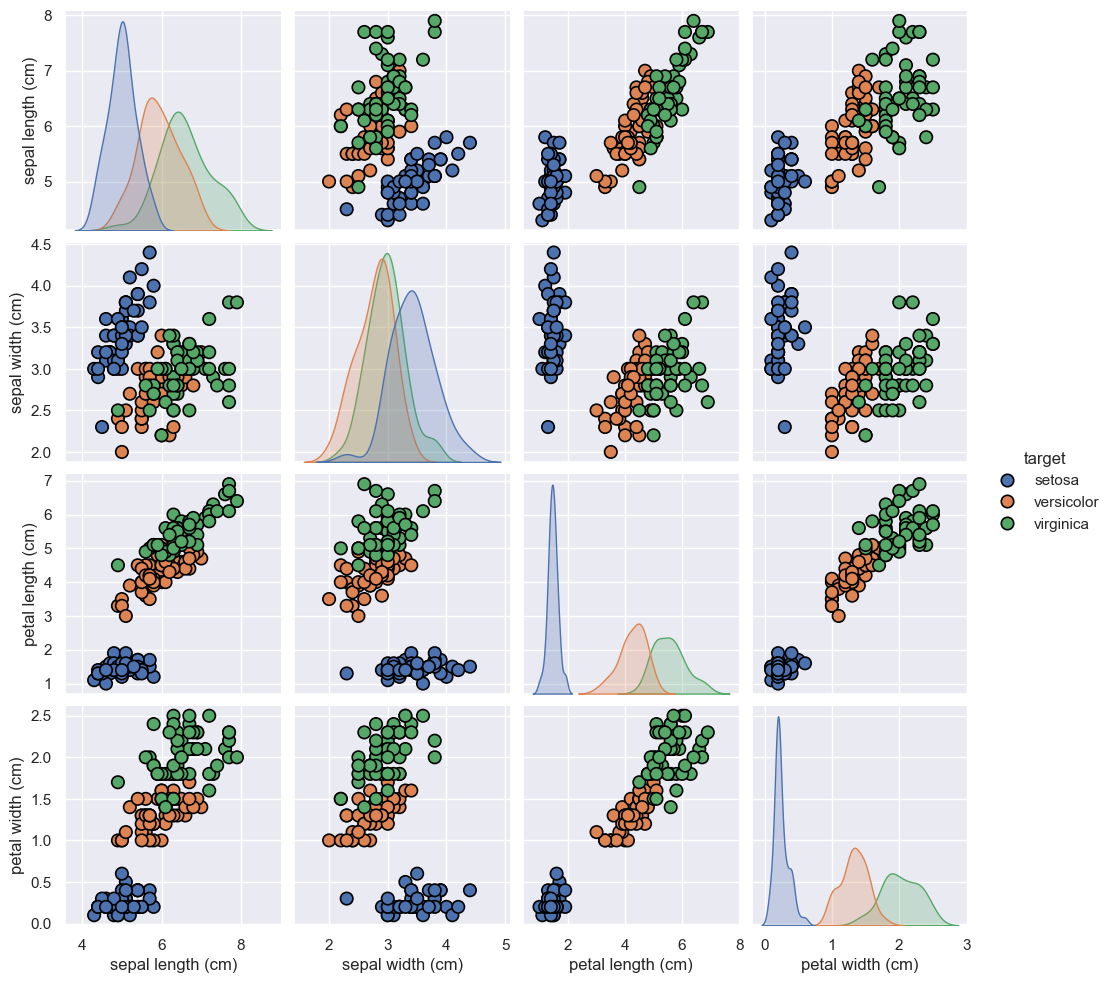

In [55]:
sns.pairplot(iris_df,
             kind="scatter",
             hue="target", #variable objetivo. Va a pintar en funcion a esta  variable
             plot_kws=dict(s=80, edgecolor="black",
                           linewidth=1.2));

### 2.3 Comparativa de dos variables cualitativas
#### Tabla

Tabla con la frecuencia de valores. Factible cuando los elementos unicos por categoria no son muchos.

In [59]:
pd.crosstab(titanic_df["Embarked"],
            titanic_df["Sex"],
            margins = False) 

Sex,female,male
Embarked,,
C,11,21
Q,7,6
S,37,73


#### Diagrama de barras

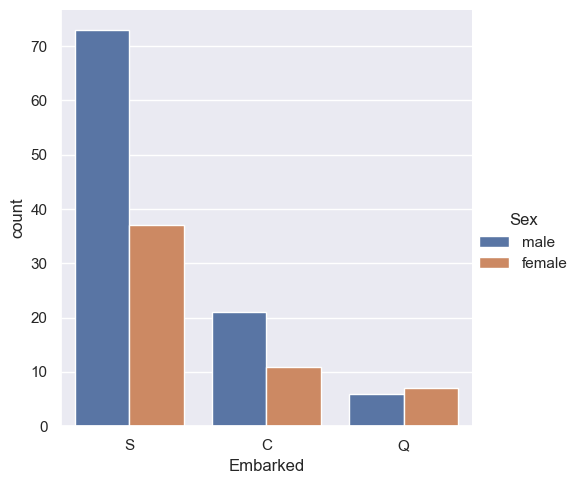

In [64]:
sns.catplot(x='Embarked',
            hue='Sex',
            kind='count',
            orient='v',
            data=titanic_df);

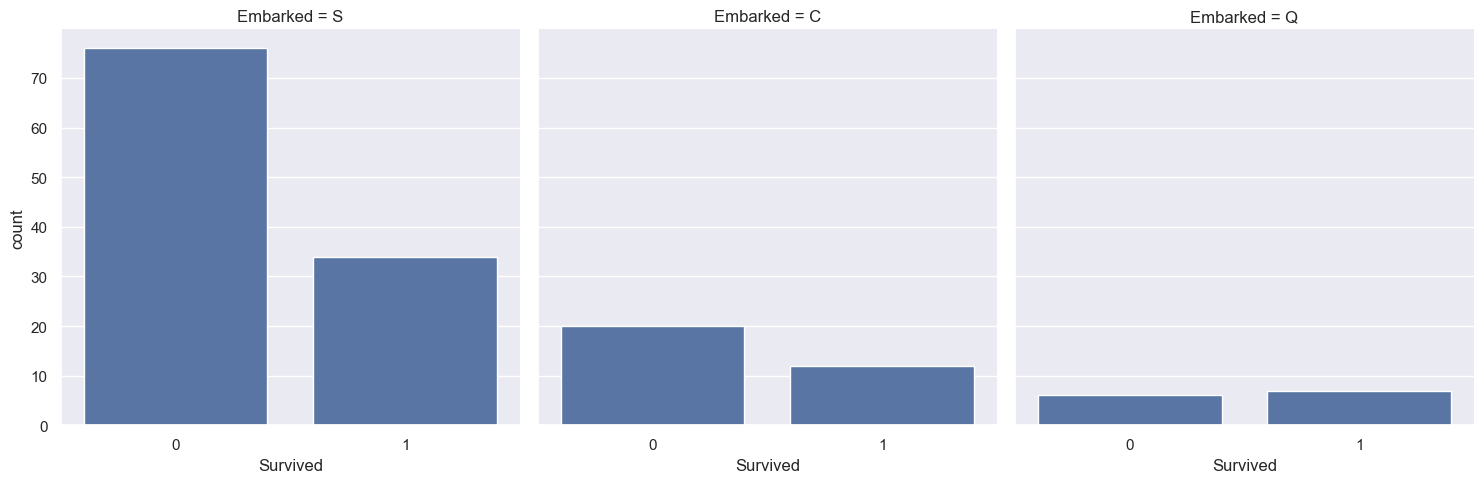

In [67]:
sns.catplot(x="Survived",
            col="Embarked",
            col_wrap=3,
            data=titanic_df,
            kind="count");

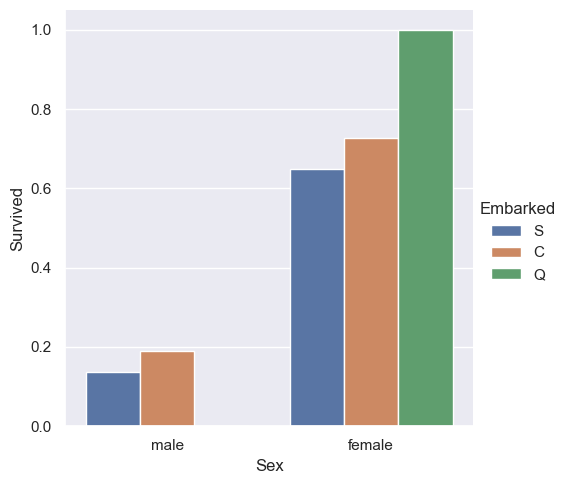

In [66]:
sns.catplot(x="Sex",
            y="Survived",
            hue="Embarked", #la variable DETERMINANTE
            kind="bar",
            data=titanic_df,
            ci=None); # Para que elimine las barras de error

### 2.4 Comparativa de dos variables cualitativas y cuantitativas
#### Time series

In [68]:
heart_df.head(2)

,Unnamed: 0,country,year,sex,age,sick_no,population,sick/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent


In [74]:
heart=heart_df[heart_df['country'].isin(['Spain', 'Germany', 'France'])]
heart=heart.groupby(['country', 'year']).sum()
heart.reset_index(inplace=True)

In [83]:
heart[['year','sick_no']].head(2)

,year,sick_no
0,1985,12501
1,1986,12529


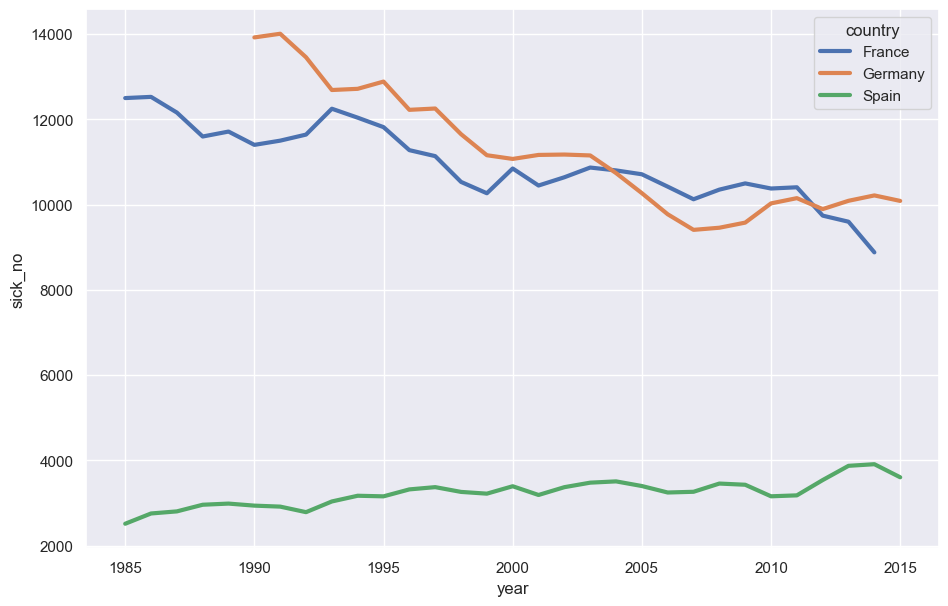

In [84]:
plt.figure(figsize=(11,7))
sns.lineplot(data=heart,
             x="year",
             y="sick_no",
             hue="country",
            linewidth = 3);

#### Treemap
Interesante para mostrar una variable numérica vs una categórica

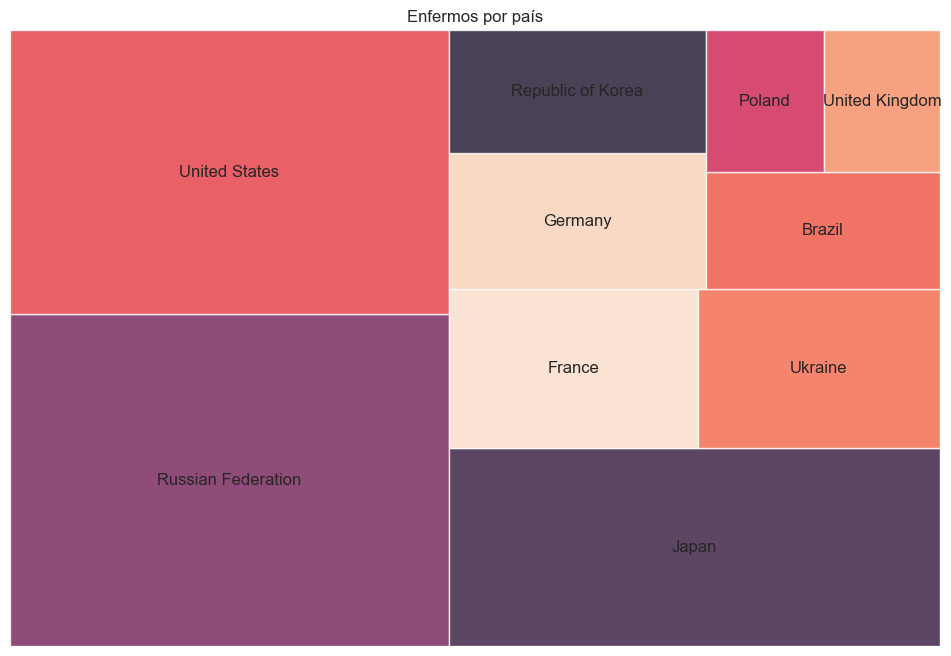

In [87]:
enfermos=heart_df.groupby("country").sum()['sick_no'].sort_values(ascending=False)[:10]
plt.figure(figsize=(12,8))
squarify.plot(sizes=enfermos.values, label=enfermos.index, alpha=.8 )
plt.axis('off')
plt.title("Enfermos por país")
plt.show()